#Introduction to Unsupervised Learning

Unsupervised learning is a branch of machine learning where the model learns patterns from unlabeled data.

Unlike supervised learning—where the model is provided with input–output pairs—**unsupervised methods** try to extract the underlying structure or distribution in the data.


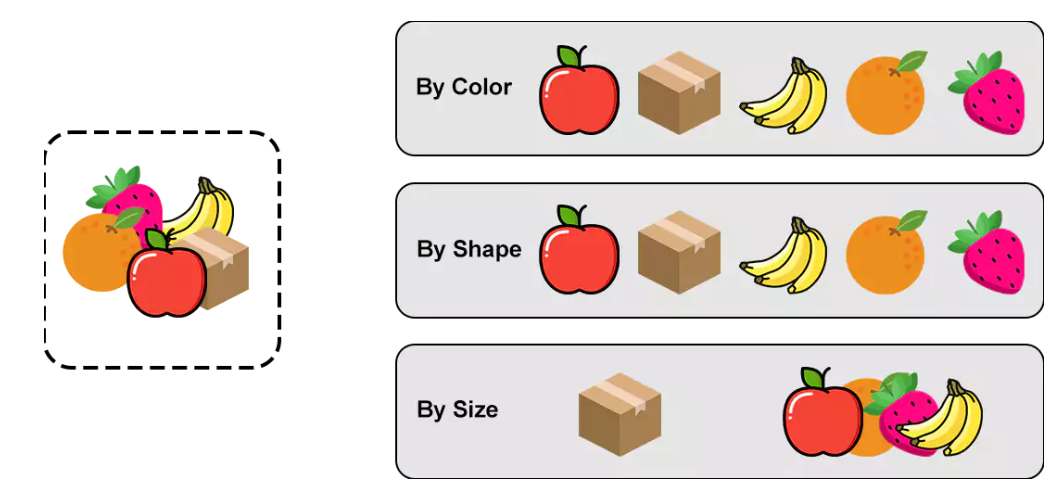

Common applications include:

1. **Clustering**: Grouping similar data points together.
2. **Dimensionality Reduction**: Reducing the number of features while retaining important information (e.g., Principal Component Analysis or PCA).
3. **Anomaly Detection**: Identifying outliers or unusual patterns.


In **unsupervised learning**, the algorithm is not given explicit feedback about the correctness of its outputs, so the goal is to **discover hidden patterns or structures**.



#Clustering Techniques

**Clustering** is the process of grouping a set of objects so that objects in the same group (or cluster) are more similar to each other than to those in other groups. Clustering techniques can be broadly categorized as:

1. **Partitioning Methods**: (e.g., KMeans) where data is divided into a predefined number of clusters.
2. **Hierarchical Methods**: (e.g., Agglomerative Hierarchical Clustering) where a hierarchy of clusters is formed.
3. **Density-Based Methods**: (e.g., DBSCAN) where clusters are formed based on the density of data points.

Each method has its strengths and is chosen based on the dataset's properties and the desired outcome.

Clustering is the process of dividing data into groups (clusters) such that:

- **Intra-cluster similarity is high**: data points in the same cluster are very similar.
- **Inter-cluster similarity is low**: data points in different clusters are distinct.

#KMeans Clustering

KMeans is one of the most popular partitioning algorithms. Its key steps include:

1. **Initialization**: Choose 𝐾  initial centroids (often randomly).
2. **Assignment**: Assign each data point to the nearest centroid based on a distance metric (typically Euclidean distance).
3. **Update**: Compute new centroids as the mean of all points assigned to each cluster.
4. **Iteration**: Repeat the assignment and update steps until convergence (i.e., cluster assignments no longer change or a maximum number of iterations is reached).

* **Pros**: Simple, fast, and efficient for large datasets.
* **Cons**: Requires specifying 𝐾 in advance, sensitive to outliers, and can converge to a local optimum.

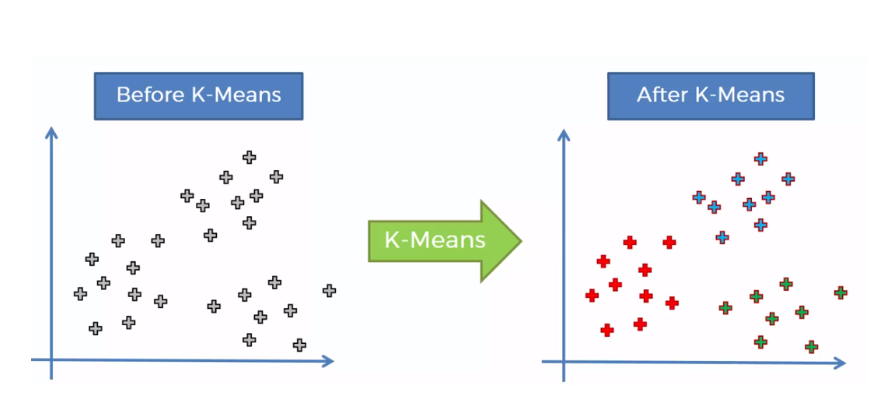

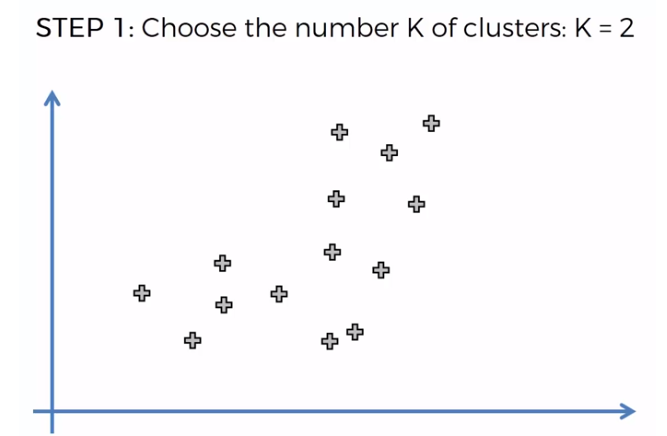

The second step is to allocate K random points as centroids.

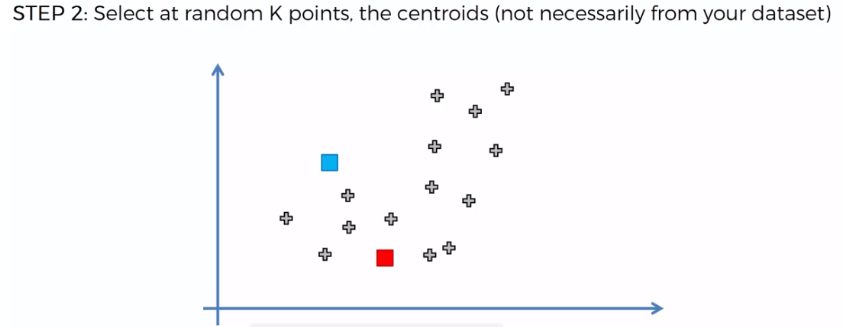

In the third step the dataset points would be allocated to the centroid which is closest to them

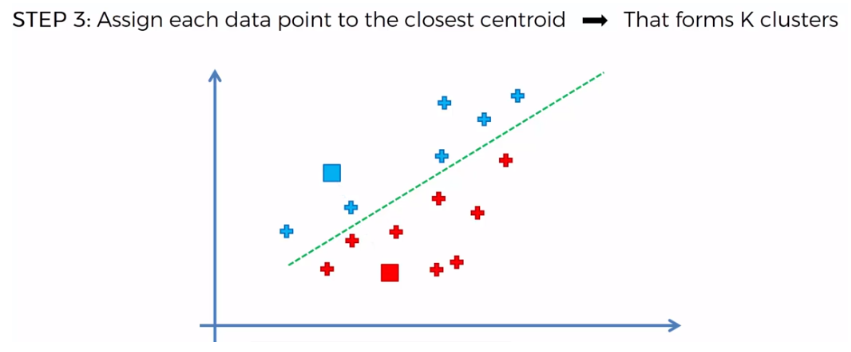

The fourth step is to calculate the centroid of the individual clusters and place the old centroid there.

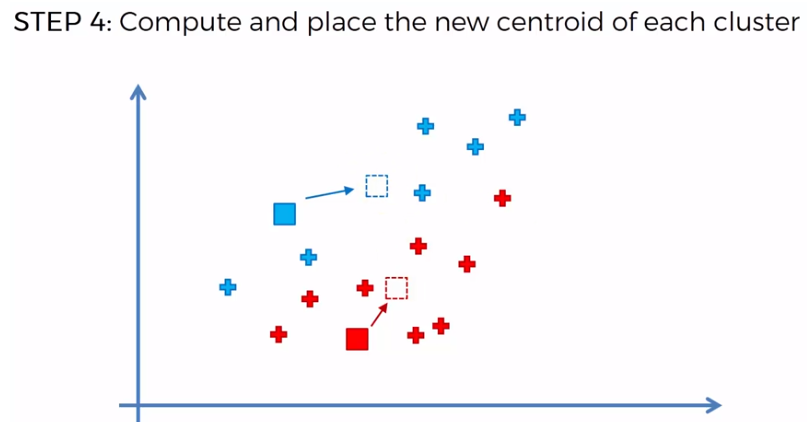

The fifth step is to reassign points like we did in step 3. If reassignment takes place then we need to go back to step four. If no reassignment takes place then we can say that our model has converged and its ready

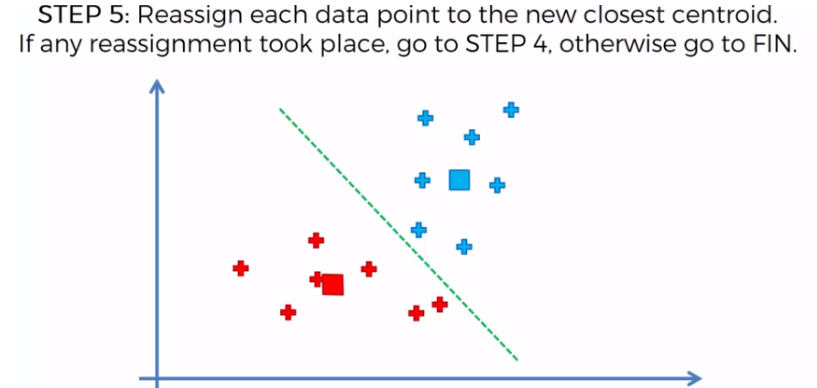

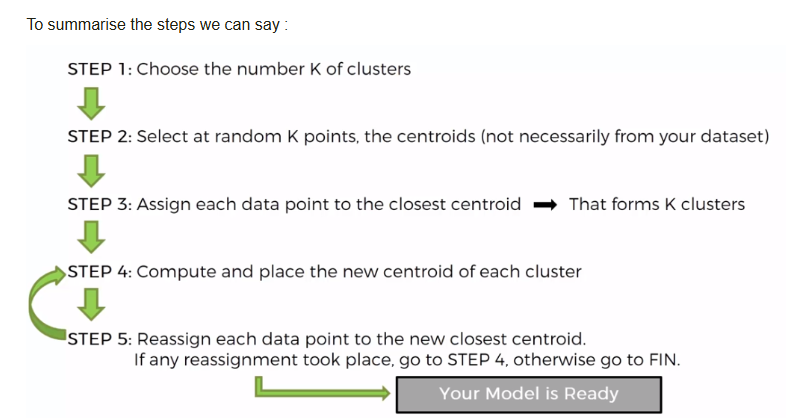

##Choosing the right K

The way to evaluate the choice of K is made using a parameter known as **WCSS**.

**WCSS** stands for **Within Cluster Sum of Squares**.

It should be low. Here's the formula representation for example when *K = 3*

Summation Distance(p,c) is the sum of distance of points in a cluster from the centroid.

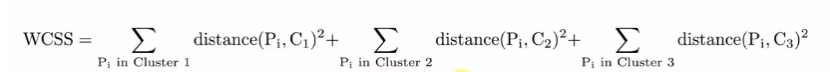

The **Elbow Method** is then used to choose the **best K value.**

In the depiction below we can see that after 3 there's no significant decrease in WCSS so 3 is the best here.

Therefore there's an elbow shape that forms and it is usually a good idea to pick the number where this elbow is formed.

There would be many times when the graph wouldn't be this intuitive but with practice it becomes easier.

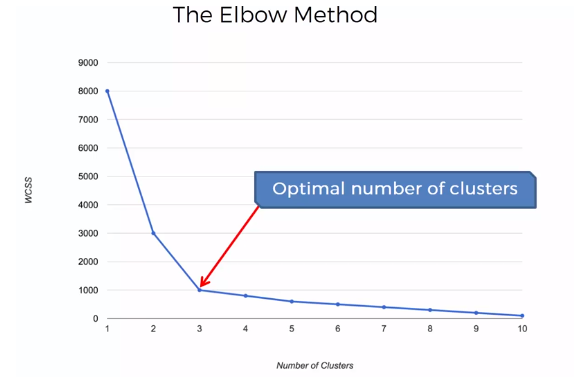

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

# Load the dataset
dataset = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
dataset.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
dataset.drop_duplicates(inplace=True)

Case 1:  Segmentation based on Spending Score and Income

In [ ]:
# using only Spending_Score and  income variable for easy visualisation
X1 = dataset.iloc[:, [2, 3]].values

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
inertia1=[]

for n in range(1 , 11):   # run this for k = 1 upto 10
    model1=KMeans(n_clusters=n, init='k-means++', n_init=20, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model1.fit(X1)
    inertia1.append(model1.inertia_)

print(inertia1)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1408: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



[176108.77999999997, 87121.56591478694, 59486.961439280356, 39502.778500645385, 31659.353138717805, 25399.022004416987, 21873.21105794789, 18850.694236178268, 16063.171283544827, 13696.035781249606]


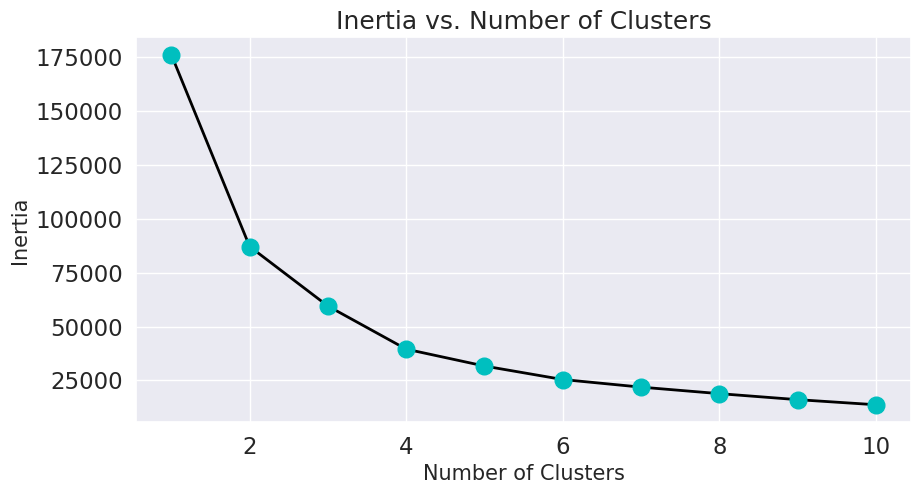

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(range(1,11)),inertia1 ,color='black', marker='o',linewidth=2, markersize=12, markerfacecolor='c', markeredgecolor='c')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.title('Inertia vs. Number of Clusters',fontsize=18)
plt.show()

In [ ]:
#We can see that if the number of clusters is smaller than 5,
# the inertia has a high value but
# if the number of clusters is larger than 5, the inertia is relatively constant.
# So we choose 5 as the optimal number of clusters.

# Fitting K-Means to the dataset
# Assuming X was used to fit K-Means, ensure it has the correct features

model1 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                random_state=111, algorithm='elkan')
model1.fit(X1)

labels1 = model1.labels_
centroids1 = model1.cluster_centers_  # Extract centroids

centroids1

array([[ 25.06451613,  59.48387097],
       [ 36.6       , 109.7       ],
       [ 29.53658537,  27.24390244],
       [ 56.66666667,  48.92156863],
       [ 37.89473684,  78.28070175]])

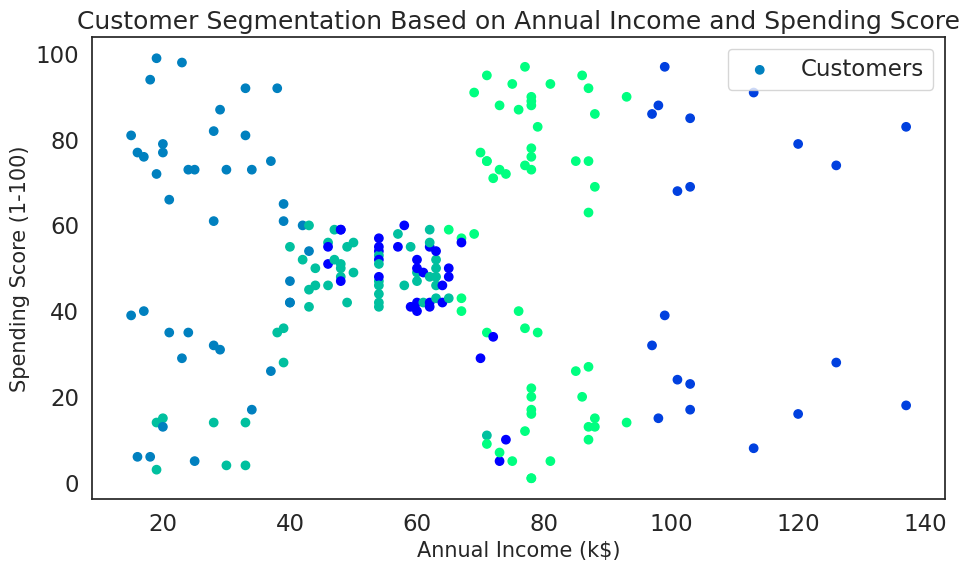

In [ ]:
# Visualising the clusters
plt.figure(figsize=(11,6))
sns.set_style('white')
# Scatter plot of customer data
plt.scatter(x=dataset['Annual Income (k$)'], y=dataset['Spending Score (1-100)'], c=labels1, cmap='winter', label="Customers")

# Labels and title
plt.xlabel('Annual Income (k$)', fontsize=15)
plt.ylabel('Spending Score (1-100)', fontsize=15)
plt.title('Customer Segmentation Based on Annual Income and Spending Score', fontsize=18)
plt.legend()
plt.show()

#Annual Income (k$)	Spending Score (1-100)

Case 2: Segmentation Based on Age and Spending Score

In [ ]:
X2=dataset[['Age','Spending Score (1-100)']]

inertia2=[]

for n in range(1 , 11):
    model2=KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model2.fit(X1)
    inertia2.append(model2.inertia_)

print(inertia2)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1408: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



[176108.77999999997, 87121.56591478694, 59486.961439280356, 39502.778500645385, 31672.265801612364, 25416.40245864744, 22036.77658421442, 18850.694236178268, 16080.913477534412, 13803.928264412934]


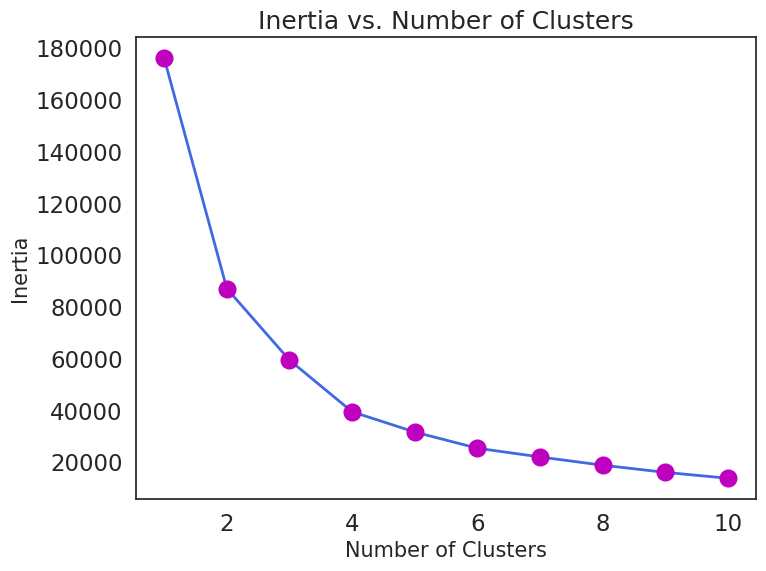

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1 , 11)), inertia2, color='royalblue', marker='o',linewidth=2, markersize=12, markerfacecolor='m', markeredgecolor='m')
plt.title('Inertia vs. Number of Clusters',fontsize=18)
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.show()

We can see that if the number of clusters is smaller than 4, the inertia has a high value but if the number of clusters is larger than 4, the inertia is relatively constant.

**So we choose 4 as the optimal number of clusters.**

In [ ]:
model2=KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model2.fit(X2)
labels2=model2.labels_
centroids2=model2.cluster_centers_

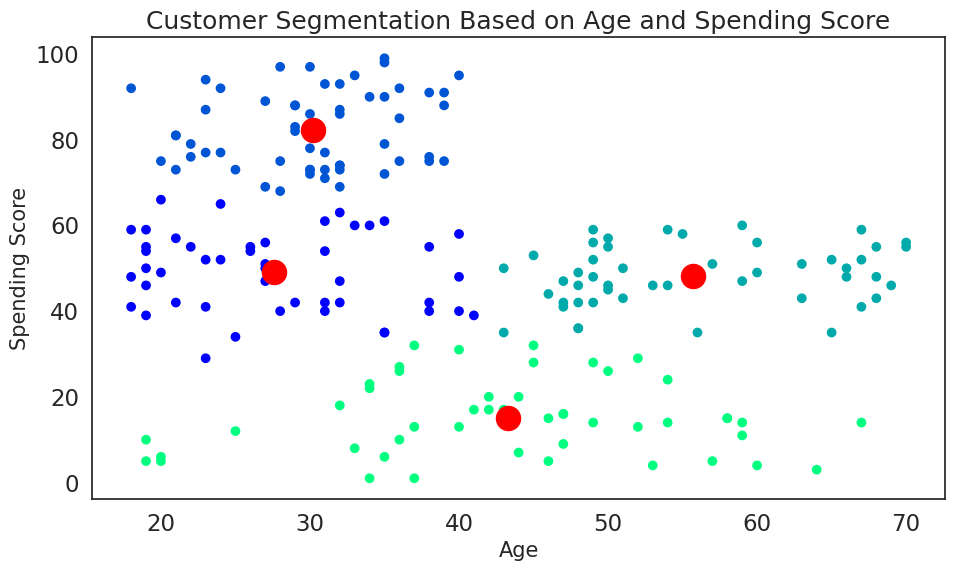

In [ ]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x=dataset['Age'], y=dataset['Spending Score (1-100)'],c=labels2,cmap='winter')
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1], s = 300 , c = 'red')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Spending Score',fontsize=15)
plt.title('Customer Segmentation Based on Age and Spending Score',fontsize=18)
plt.show()

#Annual Income (k$)	Spending Score (1-100)

**Case 3: Segmentation Based on Age, Annual Income and Spending Score**

In [ ]:
X3=dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
inertia3=[]
for n in range (1,10):
    model3=KMeans(n_clusters=n,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model3.fit(X3)
    inertia3.append(model3.inertia_)
print(inertia3)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1408: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



[308812.7800000001, 212840.16982097193, 143342.75157170597, 104366.151455562, 75479.76429338777, 58300.443321590676, 51525.773770373744, 44307.87341670445, 40932.6282276547]


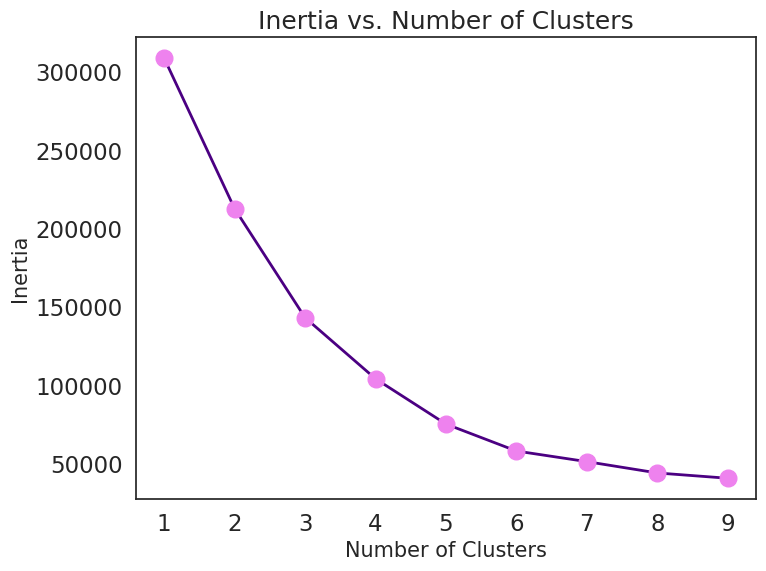

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(list(range (1,10)),inertia3, color='indigo',marker='o', linewidth=2, markersize=12, markerfacecolor='violet', markeredgecolor='violet')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.title('Inertia vs. Number of Clusters',fontsize=18)
plt.show()

We can see that if the number of clusters is smaller than 6, the inertia has a high value but if the number of clusters is larger than 6, the inertia is relatively constant.

**So we choose 6 as the optimal number of clusters.**

In [ ]:
model3=KMeans(n_clusters=6,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model3.fit(X3)
centroids3=model3.cluster_centers_
labels3=model3.labels_

In [ ]:
import plotly.express as px

fig=px.scatter_3d(data_frame=dataset,x='Age',y='Annual Income (k$)',z='Spending Score (1-100)',color=labels3, color_continuous_scale='bluered')
fig.update_layout(
    title={
        'text': 'Customer Segmentation Based on Age, Annual Income and Spending Score',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

We implemented three different segmentation strategies by K-Means Clustering based on:

- Age and Spending Score
- Annual Income and Spending Score
- Age, Annual Income and Spending Score

The number of clusters were different in different strategies, varying between 4 and 6 groups of customers.

##Compare Cluster Quality Metrics

You can use the following evaluation metrics to assess clustering performance across different scenarios:

a. **Silhouette Score (Higher is better)**
  - Measures how well-separated the clusters are.
  - A score close to 1 means well-defined clusters, 0 means overlapping clusters, and negative values indicate poor clustering.

b. **Davies-Bouldin Index (Lower is better)**
  - Measures the compactness and separation of clusters.
  - A lower value indicates better clustering.

c. **Calinski-Harabasz Index (Higher is better)**
  - Measures the ratio of between-cluster variance to within-cluster variance.
  - A higher score means better-defined clusters.

In [ ]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette_avg1 = silhouette_score(X1, labels1)
silhouette_Avg2 = silhouette_score(X2, labels2)
silhouette_avg3 = silhouette_score(X3, labels3)


# Print the result
print(f'Silhouette Score for model1 (K=5): {silhouette_avg1:.4f}')
print(f'Silhouette Score for model2 (K=4): {silhouette_Avg2:.4f}')
print(f'Silhouette Score for model3 (K=6): {silhouette_avg3:.4f}')


Silhouette Score for model1 (K=5): 0.4023
Silhouette Score for model2 (K=4): 0.4997
Silhouette Score for model3 (K=6): 0.4523


In [ ]:
# Davies-Bouldin Index (Lower is better)
from sklearn.metrics import davies_bouldin_score

davies_b1 = davies_bouldin_score(X1, labels1)
davies_b2 = davies_bouldin_score(X2, labels2)
davies_b3 = davies_bouldin_score(X3, labels3)

print(f'Davies-Bouldin Index for model1 (K=5): {davies_b1:.4f}')
print(f'Davies-Bouldin Index for model2 (K=4): {davies_b2:.4f}')
print(f'Davies-Bouldin Index for model3 (K=6): {davies_b3:.4f}')

Davies-Bouldin Index for model1 (K=5): 0.7704
Davies-Bouldin Index for model2 (K=4): 0.6869
Davies-Bouldin Index for model3 (K=6): 0.7470


#Agglomerative Hierarchical Clustering

Agglomerative Hierarchical Clustering builds clusters in a bottom-up manner:

- **Initialization**: Start with each data point as its own cluster.
- **Iteration**: Merge the closest pairs of clusters based on a linkage criterion (e.g., single, complete, average, or Ward’s linkage) until all points are merged into a single cluster or until a desired number of clusters is achieved.
- **Dendrogram**: A tree-like diagram (dendrogram) is often used to visualize the cluster merging process and to decide on the number of clusters by “cutting” the tree at a certain level.

Advantages:

- No need to specify the number of clusters beforehand.
- Provides a visual summary of the data (through dendrograms).

In [ ]:
X = dataset.iloc[:, [3, 4]].values

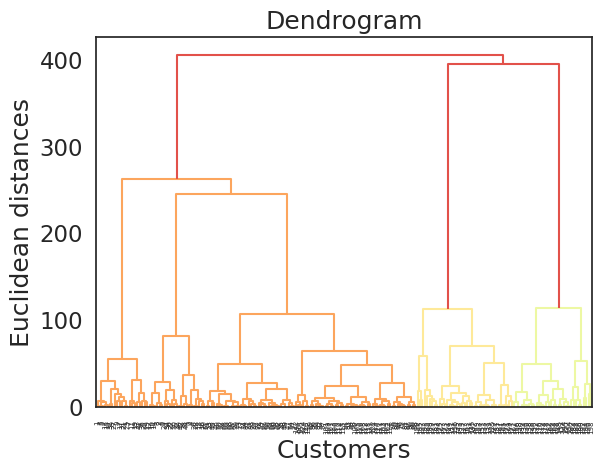

In [ ]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
#From Dendrom, we understood that there are 4 clusters which we can get by drawing horizontal line near 200(Euclidean distance)
# Fitting Hierarchical Clustering to the dataset

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
## Visualising the clusters using plotly

# Create the scatter plot
fig = px.scatter(dataset, x='Annual Income (k$)', y='Spending Score (1-100)', color=y_hc.astype(str),
                 title='Hierarchical Clustering Visualization',
                 labels={'Cluster': 'Cluster'},
                 color_discrete_sequence=px.colors.qualitative.Set1)

# Show the plot
fig.show()



In [ ]:

silhouette_avg = silhouette_score(X, y_hc)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_avg:.4f}')

db_score = davies_bouldin_score(X, y_hc)
print(f'Davies-Bouldin Index: {db_score:.4f}')


Silhouette Score for Agglomerative Clustering: 0.5530
Davies-Bouldin Index: 0.5782


#Introduction to Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that transforms a dataset into a new coordinate system where:

- **Principal Components (PCs)**: The first principal component captures the maximum variance in the data, the second captures the second most, and so on.
- **Eigenvalues and Eigenvectors**: The PCs are derived from the eigenvectors of the covariance matrix of the data, with the eigenvalues indicating the amount of variance captured.
- **Goals**: Reduce dimensionality for visualization, noise reduction, or to improve the efficiency of subsequent algorithms while retaining as much variability as possible.


Below is an example of applying PCA on the Iris dataset to reduce its dimensionality to 2 components for visualization.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

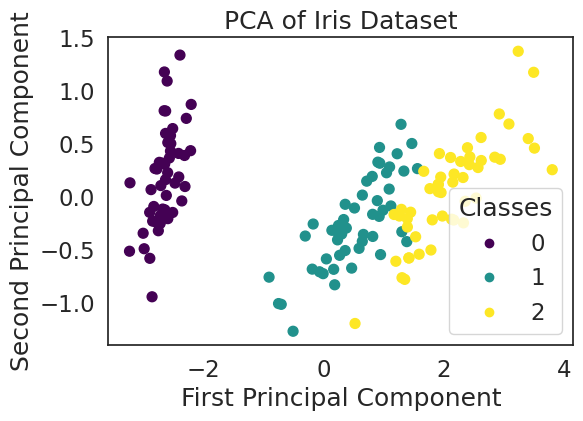

In [ ]:
# Plot the PCA result
plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA of Iris Dataset")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


In [ ]:
# Display the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.92461872 0.05306648]


Since Principal Component Analysis (PCA) is a dimensionality reduction technique, it can significantly enhance clustering performance by transforming high-dimensional data into a lower-dimensional space while preserving important patterns.


##How PCA Supports Clustering?
1. Reduces Dimensionality 📉

  - Many real-world datasets have high dimensions (e.g., customer segmentation with age, income, spending score, etc.).
  - High-dimensional space can dilute cluster separability (curse of dimensionality).
  - PCA projects data into a lower-dimensional space, keeping most of the important variance.
2. Removes Noise & Redundancy 🗑️

  - PCA filters out irrelevant features (redundant or noisy dimensions).
  - This makes clustering algorithms (like K-Means or Hierarchical Clustering) more efficient and accurate.
3. Improves Cluster Separability 📊

  - In a high-dimensional space, clusters might overlap or appear scattered.
  - PCA creates new coordinate axes (Principal Components) where clusters may be more distinctly separated.

In [ ]:
# Select relevant features for clustering
X5 = dataset.iloc[:, [2, 3, 4]].values

In [ ]:
# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X5)
X_pca

array([[-3.18705078e+01, -3.30014253e+01],
       [ 7.63396908e-01, -5.68438653e+01],
       [-5.74087256e+01, -1.31229362e+01],
       [-2.16989648e+00, -5.34779049e+01],
       [-3.21749197e+01, -3.03870050e+01],
       [-2.17827777e+00, -5.22265808e+01],
       [-5.90660565e+01, -9.54170669e+00],
       [ 1.23693261e+01, -6.16176843e+01],
       [-6.63156568e+01, -3.21359934e+00],
       [-5.65677534e+00, -4.72664534e+01],
       [-5.82366179e+01, -9.13375312e+00],
       [ 1.46202592e+01, -6.21072940e+01],
       [-5.51612126e+01, -1.00779778e+01],
       [-4.30660584e-03, -5.01134367e+01],
       [-5.27647474e+01, -1.16804199e+01],
       [ 1.94563480e+00, -5.15231943e+01],
       [-3.45062349e+01, -2.37600734e+01],
       [-7.30573032e+00, -4.35158724e+01],
       [-4.12574933e+01, -1.64734320e+01],
       [ 1.61888268e+01, -5.82998775e+01],
       [-3.27403118e+01, -2.13349462e+01],
       [-9.82702739e-01, -4.44533143e+01],
       [-5.78102821e+01, -1.86854579e+00],
       [-1.

In [ ]:
# Apply K-Means clustering on PCA-transformed data
kmeans = KMeans(n_clusters=5, random_state=42)
labels_pca = kmeans.fit_predict(X_pca)

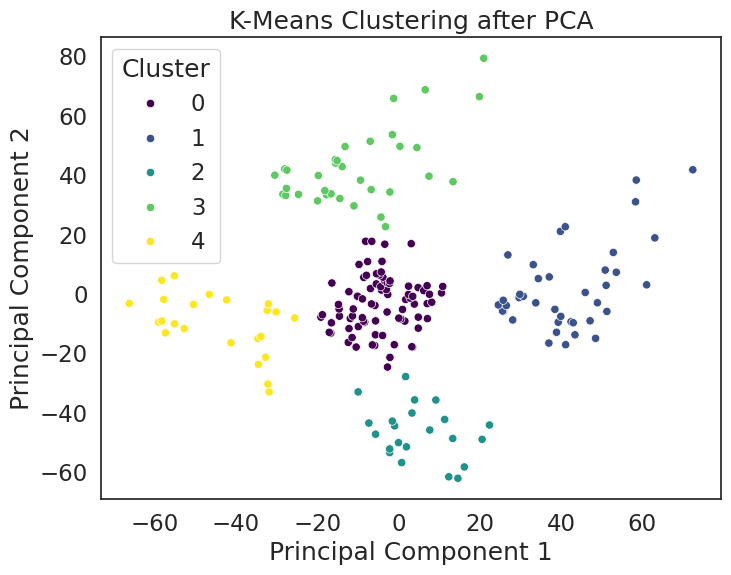

In [ ]:
# Scatter plot of PCA-reduced data with cluster labels
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_pca, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering after PCA')
plt.legend(title='Cluster')
plt.show()

Key insights:

✅ Clusters are now well-separated in 2D space.

✅ Clustering is more efficient since it runs on fewer dimensions.

✅ Noise & redundancy are removed, improving cluster purity.

When Should You Use PCA for Clustering?

1. When your dataset has high dimensionality (e.g., more than 5 features).
2. When your clustering algorithm struggles (poor separability, slow computation).
3. When you need better visualization of high-dimensional data.

In [ ]:
# Compute Silhouette Score
silhouette_pca = silhouette_score(X_pca, labels_pca)

# Compute Davies-Bouldin Score
davies_pca = davies_bouldin_score(X_pca, labels_pca)

# print the results
print(f'Silhouette Score (PCA): {silhouette_pca:.4f}')
print(f'Davies-Bouldin Index (PCA): {davies_pca:.4f}')

Silhouette Score (PCA): 0.5526
Davies-Bouldin Index (PCA): 0.5843


In [ ]:
# Put all the results of silhotte score and davies score of three cases of KMeans, and PCA with KMeans along with agglomerative clustering in a dataframe


# Case 1: silhouette_avg1  davies_b1
# Case 2: silhouette_Avg2  davies_b2
# Case 3: silhouette_avg3  davies_b3
# PCA_Kmeans: silhouette_pca   davies_pca

# agglomerative: silhouette_avg    db_score


# Creating a DataFrame with all the clustering evaluation results

clustering_results = pd.DataFrame({
    "Method": ["KMeans - Case 1", "KMeans - Case 2", "KMeans - Case 3", "PCA + KMeans", "Agglomerative Clustering"],
    "Silhouette Score": [silhouette_avg1, silhouette_Avg2, silhouette_avg3, silhouette_pca, silhouette_avg],
    "Davies-Bouldin Score": [davies_b1, davies_b2, davies_b3, davies_pca, db_score]
})

clustering_results


,Method,Silhouette Score,Davies-Bouldin Score
0,KMeans - Case 1,0.402292,0.770388
1,KMeans - Case 2,0.499739,0.686933
2,KMeans - Case 3,0.452344,0.746974
3,PCA + KMeans,0.552625,0.584302
4,Agglomerative Clustering,0.552995,0.578221


#Summary
- Unsupervised Learning helps discover hidden patterns in unlabeled data.
- Clustering Techniques like KMeans and Hierarchical Clustering group data based on similarity.
- KMeans partitions data into a specified number of clusters using iterative refinement.
- Agglomerative Hierarchical Clustering creates a tree of clusters without needing a preset number.
- PCA reduces dimensionality by projecting data onto principal components that capture the most variance.